## **Identify and Predict Credit Card Defaulter**

**ML models assignment by Priyanka Bandekar** <br>
NUID : 001055485

**Data Set Name:** 'default of credit card clients Data Set'    [`link to UCI repository`](http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) which contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.                                                                                      
####**Source:**            
**Name:** I-Cheng Yeh 

**Email addresses:** 
1.   icyeh '@' chu.edu.tw 
2.   140910 '@' mail.tku.edu.tw
**Institutions:** 
1.   Department of Information Management, Chung Hua University, Taiwan.
2.   Department of Civil Engineering, Tamkang University, Taiwan.

**Other contact information:** 886-2-26215656 ext. 3181

**Abstract :** In recent years, the credit card issuers in Taiwan faced the **cash and credit card debt crisis** and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan **over-issued cash and credit cards to unqualified applicants.** At the same time, most cardholders, irrespective of their repayment ability, **overused credit card** for consumption and accumulated **heavy credit and cash–card debts.** The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.In a well-developed financial system, **crisis management**
is on the downstream and risk prediction is on the
upstream. The major purpose of **risk prediction** is to use
financial information, such as business financial statement,
customer transaction and repayment records, etc., to **predict business performance or individual customers’ credit
risk and to reduce the damage and uncertainty.**

© Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.






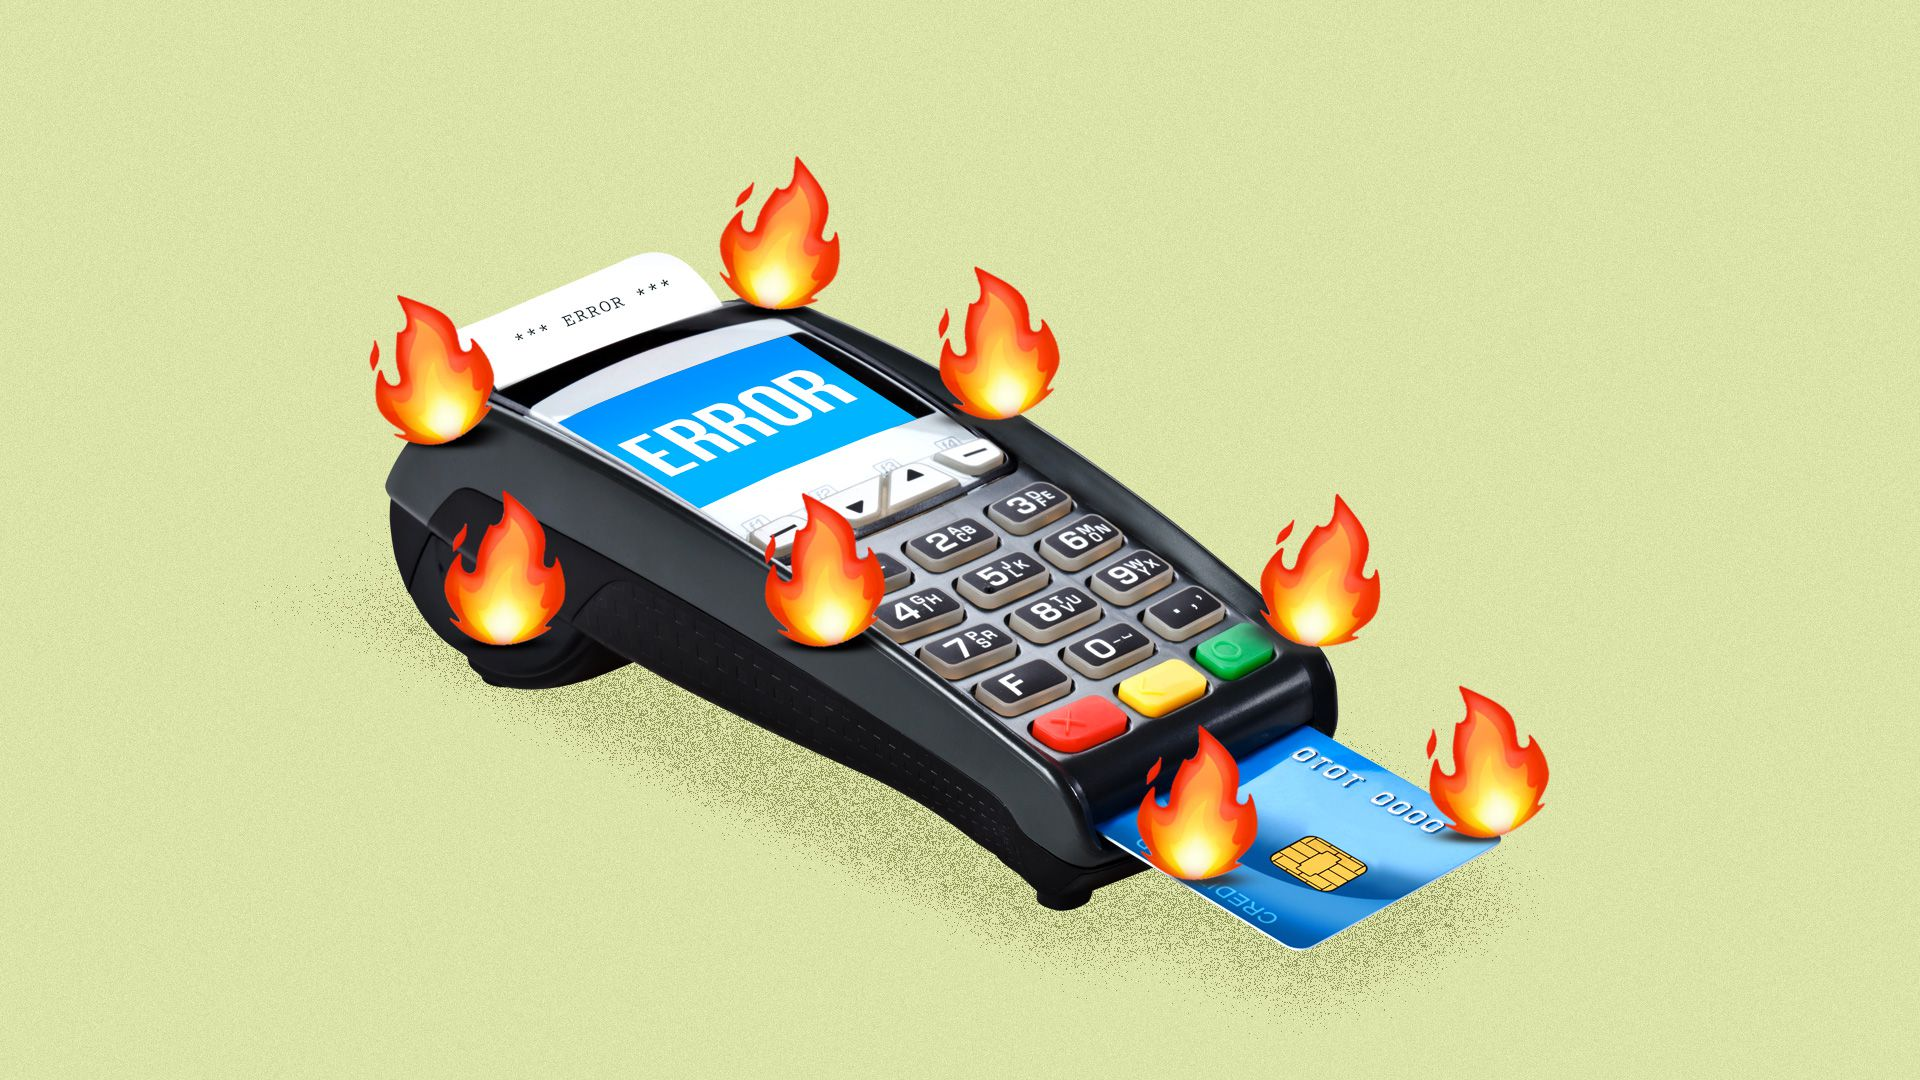    <br> © Illustration: Lazaro Gamio/Axios

Before we begin, the term **default on credit card** means that if you have **failed to make a payment on your credit card until your last due date**,your credit card company will assume that you are probably never going to do it. So in such a case, the credit card issuer will **close your account** and make a note of your debt and sell it off to a collections firm. Your debt now will be handled by the collections firm and they will keep calling you regarding your **debt** and make your life miserable. If you fail to repay it, you could be **sued and will end up in the court**. Your case will be reported to **TransUnion, Equifax, and Experian.** These are the **three major credit bureaus in the United States**. Your credit score is going to tank which means that **the bank won't easily issue you loans** and the effects will stay on your credit report for upto 7 years.                                                                          <br>
<br>                                                                                                                                                           So if you default your credit card you will be in a big trouble and could face serious consequences. 

**Aim** : To identify and Predict from the past data of the credit card if a customer will default their credit card or not. The main objective is to bring more consistency for banks when then give out loans and to find out what are the factors that will make a customer a credit card defaulter.

### **1. Collecting the Data :** Importing Packages and loading the data

In [ ]:
import numpy as np
import pandas as pd
seed = 69 # Set the random seed for the entire document

# Various Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pre-processing packages
from sklearn.preprocessing import StandardScaler

# Graph-Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing the dataset from local drive
from google.colab import files
uploaded = files.upload()

Saving creditcard_data.csv to creditcard_data.csv


In [ ]:
#Disabling the limit of column and rows

pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv("creditcard_data.csv")
df.head().T



,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


## **2. Building a Data Dictionary**

**ID:** ID of each client <br>
**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit) <br>
**SEX:** Gender (1=male, 2=female) <br>
**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
**MARRIAGE:** Marital status (1=married, 2=single, 3=others) <br>
**AGE:** Age in years <br>
**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
**PAY_2:** Repayment status in August, 2005 (scale same as above) <br>
**PAY_6:** Repayment status in April, 2005 (scale same as above) <br>
**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar) <br>
**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar) <br>
**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar) <br>
**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar) <br>
**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar) <br>
**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)<br>
**default.payment.next.month:** Default payment (1=yes, 0=no)

Dataset has a total of 30000 instances of 24 attributes from a bank in Taiwan

In [ ]:
#Descriptive Statistics (Inspecting data as a whole)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#Get the shape of Pandas DataFrame
print(df.shape) #the shape property returns a tuple representing the dimensionality of the DataFrame. The format of shape would be (rows, columns)

(30000, 25)


In [ ]:
#Finding the missing values. 
missing_values_count = df.isnull().sum()
missing_values_count

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# Finding the zero values. 
zero_values_count = df.isin([0]).sum()
zero_values_count

ID                                0
LIMIT_BAL                         0
SEX                               0
EDUCATION                        14
MARRIAGE                         54
AGE                               0
PAY_0                         14737
PAY_2                         15730
PAY_3                         15764
PAY_4                         16455
PAY_5                         16947
PAY_6                         16286
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default payment next month    23364
dtype: int64

In [ ]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## **Data Cleaning**

In [ ]:
#From observation the data in the Education column needs to be cleaned
print('Education: ', df['EDUCATION'].unique())

Education:  [2 1 3 5 4 6 0]


In [ ]:
# There are values 5,6 and 0 in the Education column which seems to be Unknown (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). 
# We can group them under '4=others'

df['EDUCATION'] = df['EDUCATION'].apply(lambda edu_value: edu_value 
                                        if ((edu_value > 0 and edu_value < 4)) 
                                        else 4) # Changes every value of x not within (and inclusive of) 1 ~ 3 to 4  

# Corrected changes
df['EDUCATION'].unique()

array([2, 1, 3, 4])

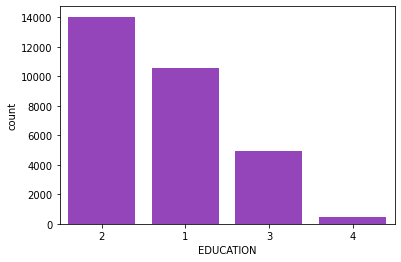

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='EDUCATION', order = df['EDUCATION'].value_counts().index, color='darkorchid');




In [ ]:
#From observation we see that the data in the Marriage column needs to be cleaned
print("Marriage: ", df['MARRIAGE'].unique())

Marriage:  [1 2 3 0]


In [ ]:
# In the above graph we see that value 0 is present and we know that the defined values are Marital status (1 = married; 2 = single; 3 = others). 
# So we can group status=0 under '3=others' since it is undefined value.

df['MARRIAGE'] = df['MARRIAGE'].apply(lambda marriage_value: marriage_value
                                     if (marriage_value > 0 and marriage_value < 3)
                                     else 3) # changes every value of x not within (and inclusive of) 1 and 2 to 3

# Corrected changes
df['MARRIAGE'].unique()

array([1, 2, 3])

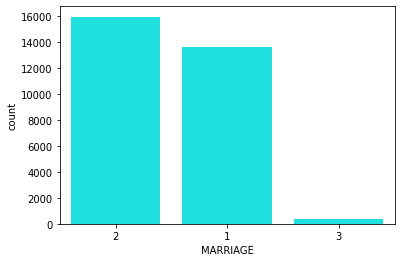

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='MARRIAGE', order = df['MARRIAGE'].value_counts().index, color='cyan')

In [ ]:
# Renaming some column for easier convention
# We are changing default.payment.next.month to Default 
df.rename(columns={'default payment next month':'Default',} , inplace=True)

# To avaoid multicollinearity we drop the ID column 
df.drop('ID', axis=1, inplace=True)
df.info()  # we see that we have 30,000 observations and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

### **Data Exploration : Mapping the Target**

In [ ]:
print(df['Default'].value_counts(),'\n')
print(len(df['Default']))

#Here we find out that 0=No-default and 1=Default payment for the customers

0    23364
1     6636
Name: Default, dtype: int64 

30000


Text(0, 0.5, 'Count')

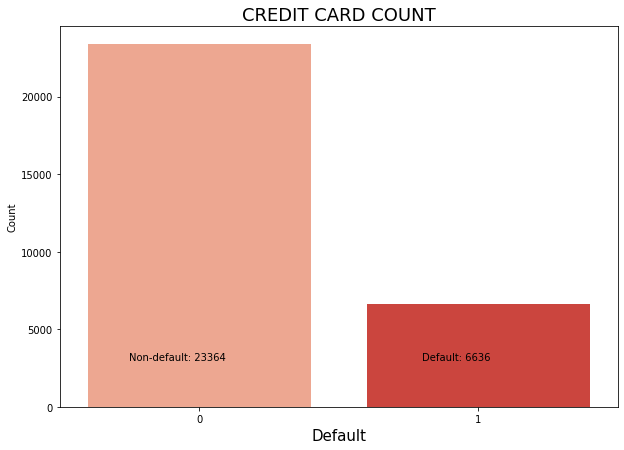

In [ ]:
# Frequency of the defaults
default = df['Default'].sum() # adds up all the default cases in the df
no_default = len(df['Default']) - default  # entire dataset - default cases

# Percentage of the defaults
default_percentage = round(default/len(df['Default']) * 100, 1)
no_default_percentage = round(no_default/len(df['Default']) * 100, 1)

# Plotting Target
fig, ax = plt.subplots(figsize=(10,7))  # Sets size of graph
sns.countplot('Default',data=df, palette="Reds")   
plt.annotate('Non-default: {}'.format(no_default),xy=(-0.25, 3000))
plt.annotate('Default: {}'.format(default),xy=(0.8, 3000))
plt.title('CREDIT CARD COUNT', size=18)
plt.xlabel("Default",size=15)
plt.ylabel('Count')

### **Breakdown of different variables by Default/Non-default payment**

**LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**SEX:** Gender (1 = male; 2 = female).

**EDUCATION:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE:** Marital status (1 = married; 2 = single; 3 = others).

**PAY_0 ~ PAY_6:** History of past payment.
We tracked the past monthly payment records (from April to September, 2005) as follows:
PAY_0 = the repayment status in September, 2005
PAY_2 = the repayment status in August, 2005;
. . .;
PAY_6 = the repayment status in April, 2005

In [ ]:
# Creating a new dataframe using different categories
df_category = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','Default']]

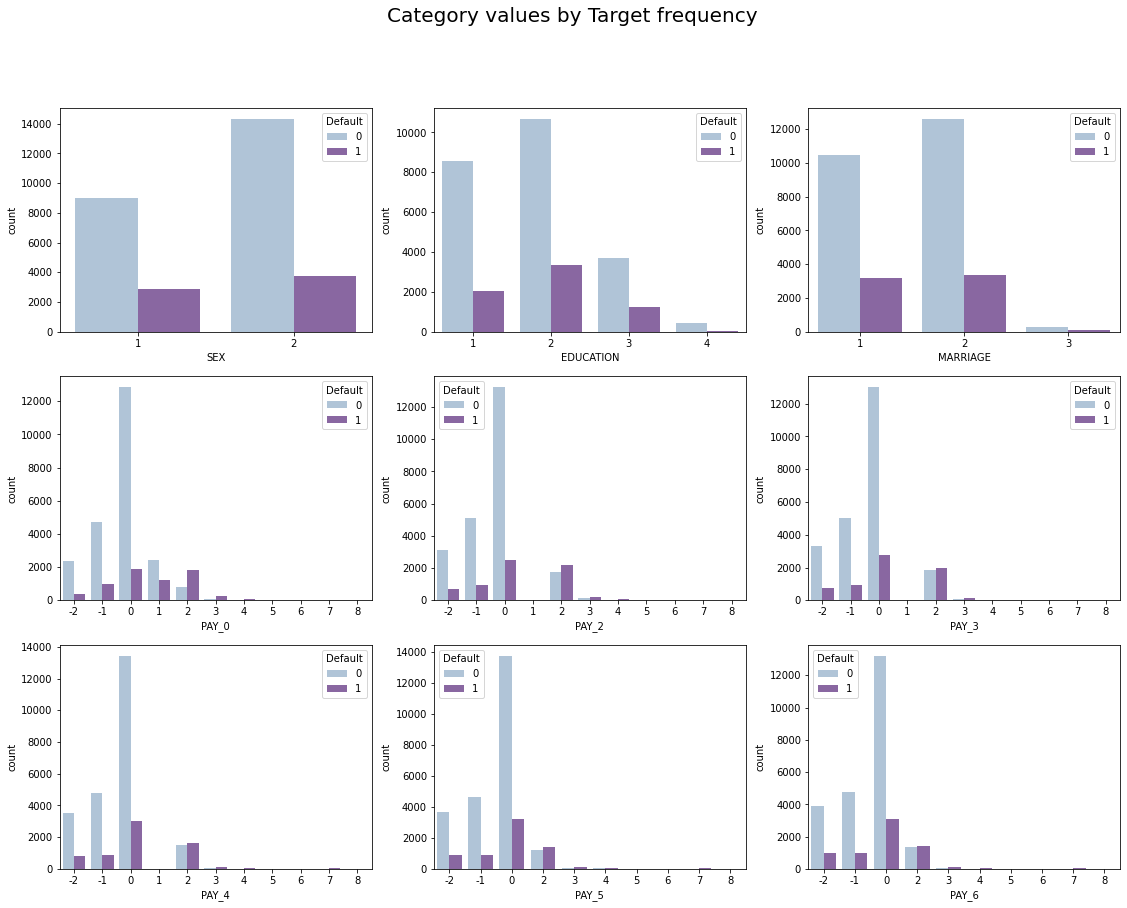

In [ ]:
# 0= NON-DEFAULT, 1= DEFAULT 
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("Category values by Target frequency",size=20)

# Plotting each category
ax1 = sns.countplot(x='SEX', hue = 'Default', data=df_category, palette='BuPu', ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION', hue = 'Default', data=df_category, palette='BuPu', ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE', hue = 'Default', data=df_category, palette='BuPu', ax=axes[0,2])
ax4 = sns.countplot(x='PAY_0', hue = 'Default', data=df_category, palette='BuPu', ax=axes[1,0])
ax5 = sns.countplot(x='PAY_2', hue = 'Default', data=df_category, palette='BuPu', ax=axes[1,1])
ax6 = sns.countplot(x='PAY_3', hue = 'Default', data=df_category, palette='BuPu', ax=axes[1,2])
ax7 = sns.countplot(x='PAY_4', hue = 'Default', data=df_category, palette='BuPu', ax=axes[2,0])
ax8 = sns.countplot(x='PAY_5', hue = 'Default', data=df_category, palette='BuPu', ax=axes[2,1])
ax9 = sns.countplot(x='PAY_6', hue = 'Default', data=df_category, palette='BuPu', ax=axes[2,2])


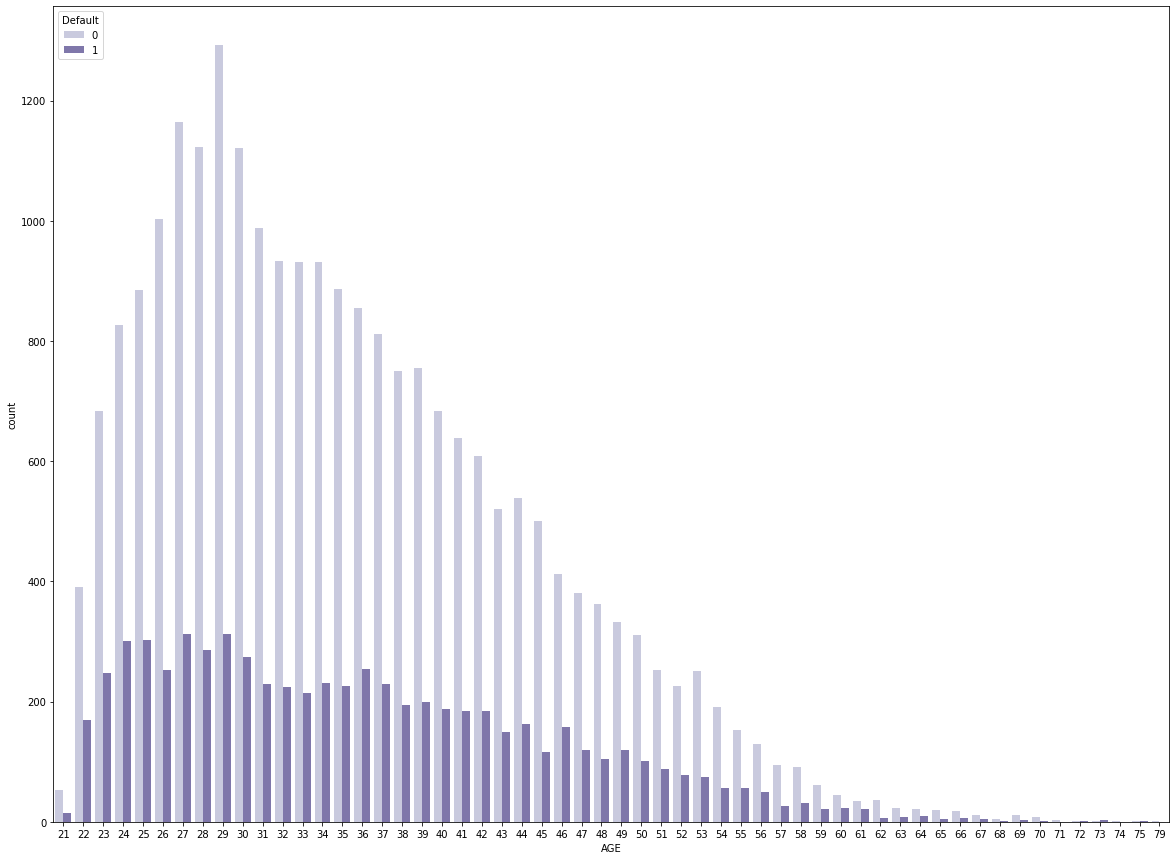

In [ ]:
# By Age
fig, axz = plt.subplots(figsize=(20,15))
axz = sns.countplot(x='AGE', hue='Default', data=df, palette='Purples')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


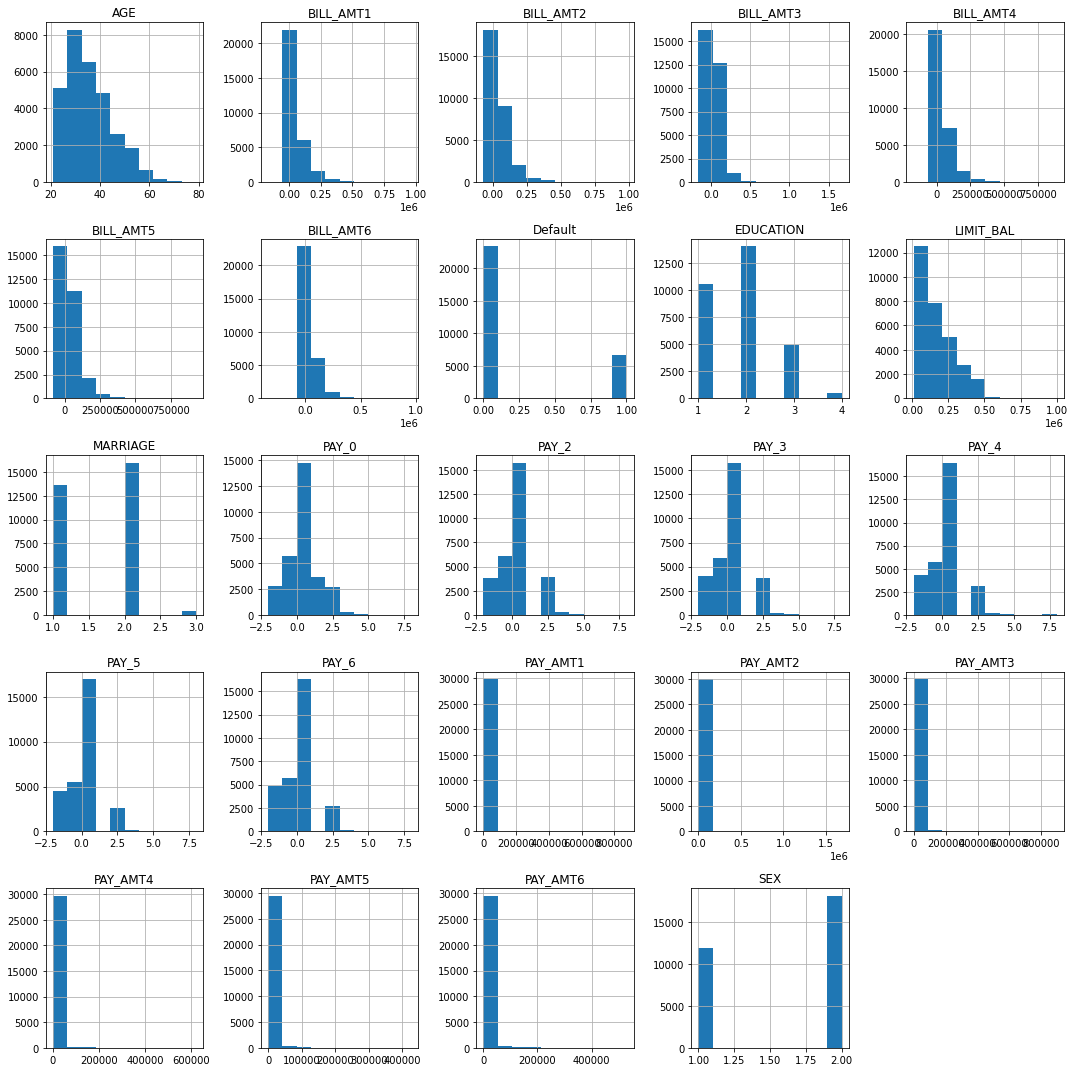

In [ ]:
#Frequency distribution of the entire dataset using a Histogram
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

## **Feature Selection**

In [ ]:
# Correlation Matrix

df.columns

#This will give us all the features.

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

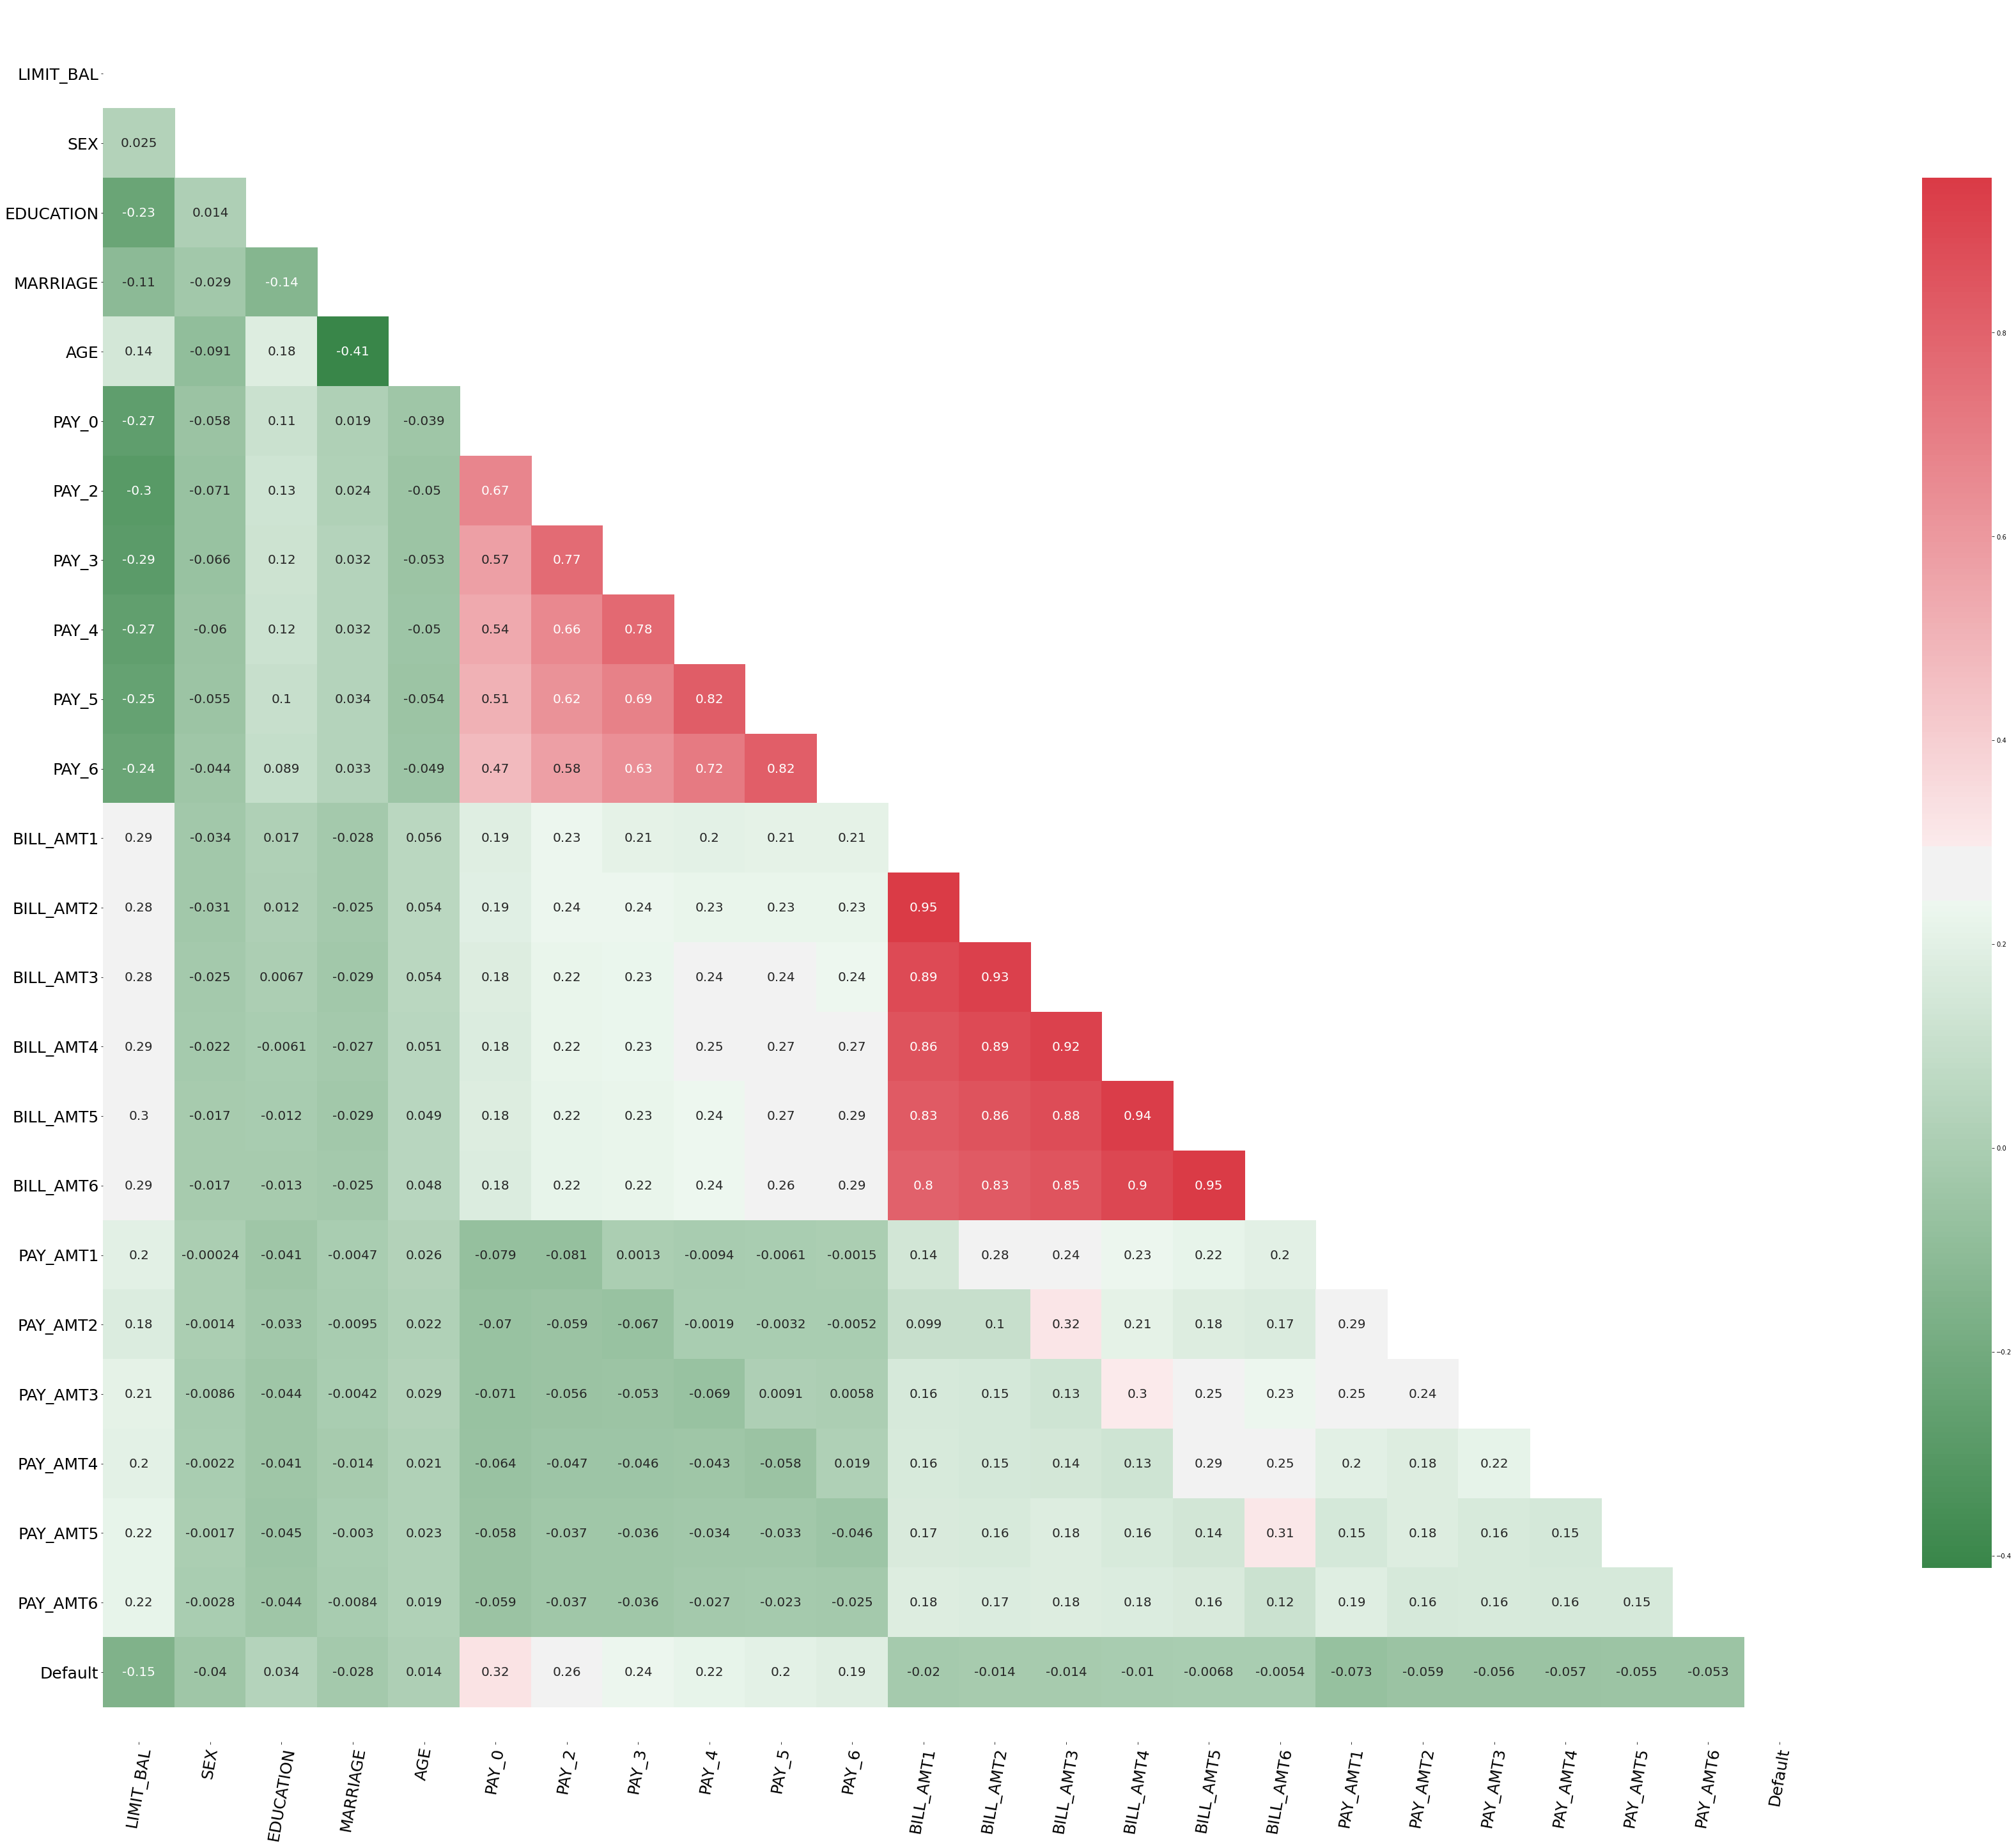

In [ ]:
#Plot the features on the correlation matrix to remove if any multicollinearity in the model 

# Creating the data
data = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  

# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# To change the label size as it looks all cramped up
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);



In [ ]:
#Default correlation
df_default_corr = data.iloc[:-1,-1:]  
df_default_corr

,Default
LIMIT_BAL,-0.153520
SEX,-0.039961
EDUCATION,0.033842
MARRIAGE,-0.027575
AGE,0.013890
PAY_0,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149


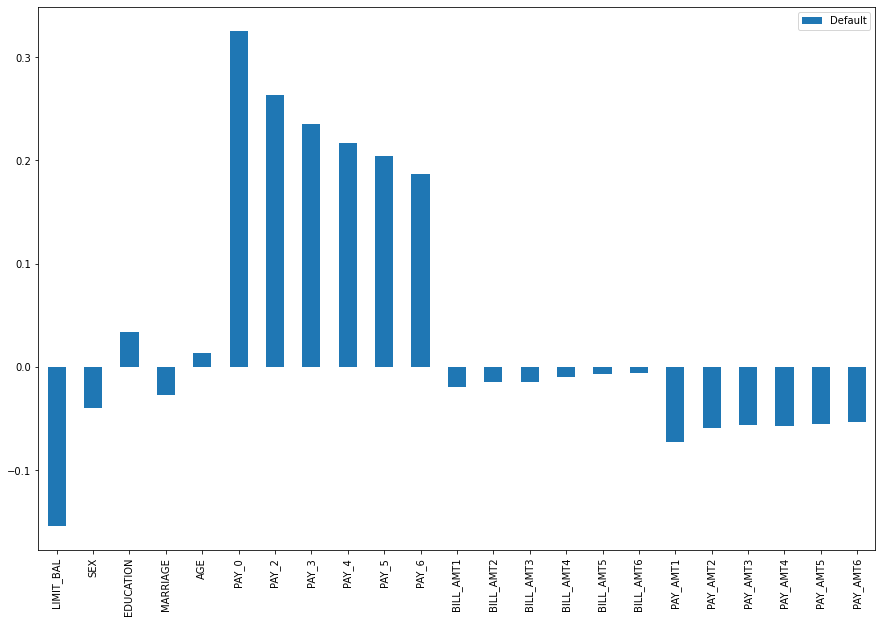

In [ ]:
#Plotting the default correlation
df_default_corr.plot(kind='bar',figsize=(15,10))

In [ ]:
#From the observation above we can see that PAY_0 has the highest correlation to DEFAULT 

data.iloc[:-1,-1:].max()

Default    0.324794
dtype: float64

### **Training,Validating and Scoring&Scaling the following models : <br>**
1. Logistic Regression <br>
2. Random Forest
3. Decision Trees





In [ ]:
#Checking for the unique data again,according to the chsnges made in the variables to verify the values before splitting it

df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Default          2
dtype: int64

### **Splitting the data into Test and Train**

In [ ]:
# Separate data into X and y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [ ]:
print("Number of data points used to Train",X_train.shape[0])
print("Number of data points used to Test",X_test.shape[0])
print("Number of y train data points",y_train.shape[0])
print("Number of X train data points",y_test.shape[0])

Number of data points used to Train 24000
Number of data points used to Test 6000
Number of y train data points 24000
Number of X train data points 6000


### **Random Forest** 

In [ ]:
# Usually we remove some features so that the model does not get affected by multicollinearity but Random Forest is not affected by it so we 
# are not going to remove anything.

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Feature importance (Since our data has features from 0-22, it will print all the features)
importance=rf.feature_importances_  

# feature_importances_ is an inbuilt property for Random Forest
# This property is an impurity based feature. The more important features are determined by how high they are
# The importance of a feature is computed as the (normalized) total reduction of the entropy 
# or Gini impurity(criterion) brought by that feature. It is also known as the Gini importance.

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.05960
Feature: 1, Score: 0.01176
Feature: 2, Score: 0.02010
Feature: 3, Score: 0.01407
Feature: 4, Score: 0.06642
Feature: 5, Score: 0.09180
Feature: 6, Score: 0.05201
Feature: 7, Score: 0.02461
Feature: 8, Score: 0.02003
Feature: 9, Score: 0.02334
Feature: 10, Score: 0.01642
Feature: 11, Score: 0.06077
Feature: 12, Score: 0.05511
Feature: 13, Score: 0.05132
Feature: 14, Score: 0.05086
Feature: 15, Score: 0.04941
Feature: 16, Score: 0.05004
Feature: 17, Score: 0.05183
Feature: 18, Score: 0.04878
Feature: 19, Score: 0.04788
Feature: 20, Score: 0.04350
Feature: 21, Score: 0.04295
Feature: 22, Score: 0.04737


In [ ]:
y_prediction =rf.predict(X_test) # predicting the data on test data points
y_prediction # prediction values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.8213333333333334

In [ ]:
# To get the percentage value, we multiply it by 100
(accuracy_score(y_test,y_prediction))*100


82.13333333333334

**The above prediction gives us a Accuracy Score of 82.13% which is good.**

---



In [ ]:
# Selecting the top 10 features 


import operator
importance=rf.feature_importances_
dict={}
for i,v in enumerate(importance):
    dict[i]=v
#print(dict)
features_decreasing = sorted(dict.items(),key=operator.itemgetter(1),reverse=True)
print(features_decreasing)


#Reference: https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values
           #https://machinelearningmastery.com/calculate-feature-importance-with-python/

[(5, 0.09180186254478712), (4, 0.0664233737173471), (11, 0.06077129375955224), (0, 0.0596020371189192), (12, 0.05511302370561147), (6, 0.05200972988997054), (17, 0.05182946202993372), (13, 0.0513184587089156), (14, 0.050860855180814346), (16, 0.05004330640181955), (15, 0.049408744527153214), (18, 0.048779375513487364), (19, 0.04788410976154159), (22, 0.04736732802462189), (20, 0.04350336603855833), (21, 0.042953320234451885), (7, 0.024611646940644848), (9, 0.023338578477208577), (2, 0.0201006651160859), (8, 0.02003133766665584), (10, 0.016418441058360284), (3, 0.014066583438674875), (1, 0.011763100144884728)]


### **Now let us select the top 10 features for prediction that has the most importance**

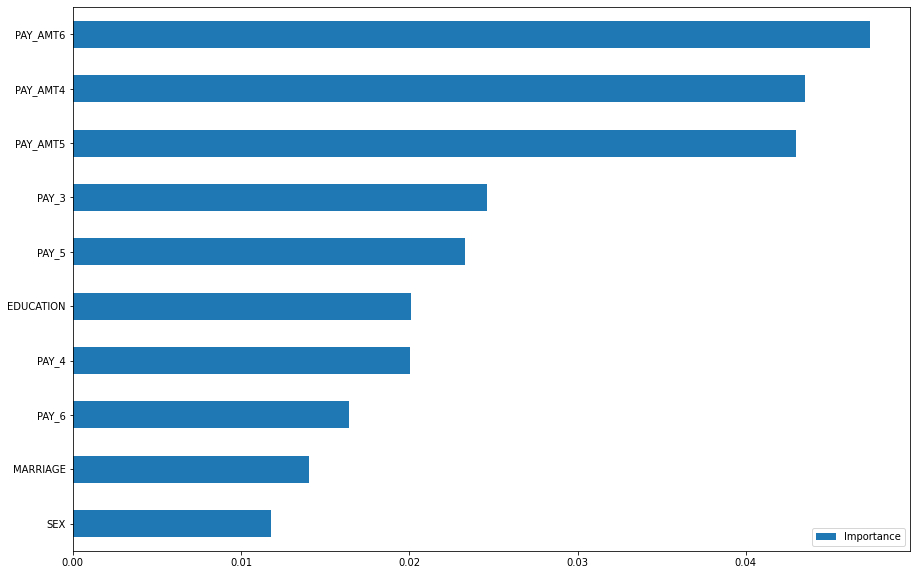

In [ ]:
importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Importance']).sort_values('Importance',ascending=True)
                                   
#Plotting the top 10 graph for feature importance
X_new1=importance.head(10)
X_new1.plot.barh(figsize=(15,10))



**Hyperparameter tuning for Random Forest with all the features**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
est=RandomForestClassifier(n_jobs=-1)
random_grid={'max_depth':[3,5,10,25,50,100,150],
            'n_estimators':[50,100,200,250,300,400],
             'criterion':['gini','entropy'],
             'bootstrap': [True,False],
              'min_samples_leaf':randint(1,4)}

In [ ]:
# Creating a function 
def hypertuning_rscv(est,random_grid,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=5,return_train_score=True) # kfold cv=5 
    rdmsearch.fit(X,y)  # Fitting the RandomizedSearchCV on data
    ht_params=rdmsearch.best_params_ # Getting best parameters 
    ht_score=rdmsearch.best_score_ # Getting Score of randomziedSearchCV
    results=pd.DataFrame(rdmsearch.cv_results_)
    return ht_params,ht_score,results

In [ ]:
rf_parameters, rf_ht_score,results=hypertuning_rscv(est,random_grid,5,X_train,y_train) # 5 possible random combinations(options) to selected 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 250}

In [ ]:
results[['param_max_depth','param_min_samples_leaf','param_n_estimators','param_criterion','mean_train_score','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_n_estimators,param_criterion,mean_train_score,mean_test_score
0,5,1,50,gini,0.818208,0.814917
1,10,1,250,entropy,0.858917,0.819042
2,10,1,250,gini,0.865760,0.819000
3,5,2,300,entropy,0.816906,0.813917
4,100,2,100,entropy,0.995896,0.814083


In [ ]:
rf_ht_score

0.8190416666666668

In [ ]:
# Classifier with parameter
est1=RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='gini', max_depth= 150,min_samples_leaf= 2, n_estimators= 100)

In [ ]:
# fit
est1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# predict
y_pred_new1=est1.predict(X_test) # predicting the data on test data points
y_pred_new1 # prediction values

array([0, 0, 0, ..., 0, 0, 0])

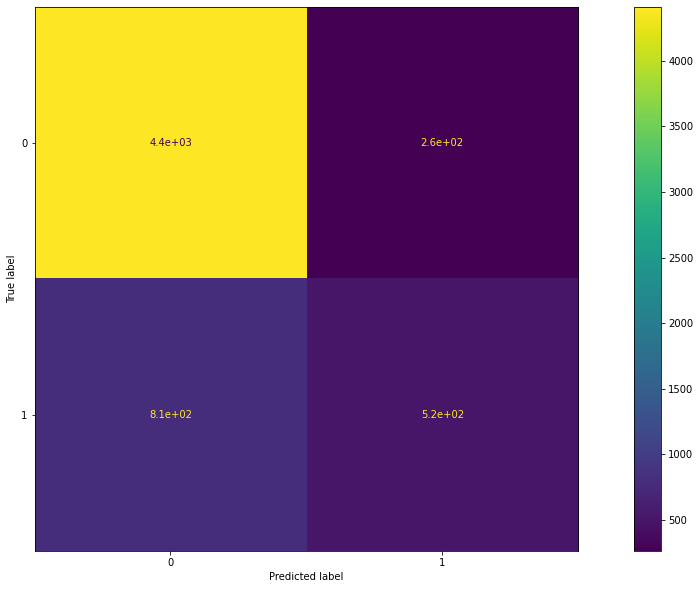

In [ ]:
# confusion matrix
# Plotting Confusion Matrix

from sklearn.metrics import confusion_matrix
# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(20, 10))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(est1, X_test, y_test,ax=ax)

# REFERENCE: https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_new1)

0.8215

In [ ]:
#Converting the accuracy to %
accuracy_score(y_test,y_pred_new1)*100

82.15

### **So, the conclusion here is that due to Hyperparameter tuning the accuracy improved from 82.13% to 82.15% which is not a significant increase**

Questions for the model : 

**1.  Is the relationship significant ?**

sklearn has property called as features_importances_ . According that property, it assigns a score to input features based on how important they are at predicting a target variable. Higher the score meaning more important 



**2. Is there any multicollinearity in the model?**

Multicollinearity exists between the features. But as we know Random Forest is not affected by the accuarcy of the regression or predective models because it uses row and column sampling which is bootstrap sampling and feature sampling.
Random Forest has various number of features and many data points,hence it is not affected by multicollinearity.



**3. In the multivariate models are predictor variables independent of all the other predictor variables?**

Bagging happens in Random Forest and Random Forest handles correlated variables using bagging.

**4. Are any model assumptions violated?**

Random Forest has no assumptions because the model performs as it is expected to and classifies the data into multi-class data. Therefore, no assumptions are violated by Random Forest.


**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

Random Forest, precisely, sklearn has a property called as feature_importances_ which gives us the variables who have the most importance. Features with the higher score are more significant when predicting more useful target variables.
The dataset which I used has PAY_AMT5 and PAY_AMT4 are the two most significant ones.



**6. Does the model makes sense?**

1.Random Forest is a very good model if we want high performance with less interpretation. Also because they are bagged decision tree models,they can split on a subset of features. It is faster to train the data on Random Forest than other models such as Decision trees because we work with subsets of features, that makes it easy to work with hundreds of features all in one model.

2.Random Forest can handle binary features,categorical features and numerical values, whether we have a classification problem or regression, it is suitable for all. We need to do very little pre-processing and the data does not need to be transformed or rescaled.

3.Random forest makes less assumptions about target variables, which means it has low bias. We initially saw that the accuracy was 81.03% but after tuning the hyperparameters we got an accuracy of 81.36%.




**7. Does regularization help?**

Regularization is usually done to reduce the model complexity and avoid the overfitting problem. To update the values of the parameters, we apply Random Forest to the cost function. To avoid overfitting, we need to limit the depth of the tree at a specific value so that it does not grow any further. To regularize this, we use a maximum depth parameter.




**8: Which independent variables are significant?**

Random Forest, precisely, sklearn has a property called as feature_importances_ which gives us the variables who have the most importance at the root of the node, namely Reduction in Entropy or Gini Impurity.

The dataset which I used has PAY_AMT5 and PAY_AMT4 are the two most significant ones.



**9:Which hyperparameters are important?**

'max_depth' is an important feature in Random Forest, it means that the maximum depth upto which the tree should grow, or else if we keep growing the tree it will lead to the overfitting problem and the best value for it was calculated using RandomSearchCV.



## **Logistic Regression**

Logistic Regression is affected by multicollinearity between the features so we need to remove those features.

## **Multicollinearity between Independent Variables**

Variable Inflation Factors (VIF) determines the strength of the correlation between the independent variables.How VIF works is that we have to take a variable and regress it against every other variable.

Variable Inflation Factors (VIF) is given by 1/(1-R^2)

Where R^2 value tells us how close the data is fitted or described by other independent variables.  

It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 

R^2 = Explained variation / Total variation

R^2 is always between 0 and 100%

0% indicates that the model explains none of the variability of the response data around its mean

A high value of R^2 means that it is highly correlated with the remaining variables.

High VIF and high multicollinearity is when the value of R^2 is closer to 1.


In [ ]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [ ]:
#Printing VIF
calc_vif(X)

,variables,VIF
0,LIMIT_BAL,4.045042
1,SEX,9.138316
2,EDUCATION,7.404015
3,MARRIAGE,6.353580
4,AGE,11.155951
5,PAY_0,1.918283
6,PAY_2,3.211462
7,PAY_3,3.727665
8,PAY_4,4.440211
9,PAY_5,4.985794


**Some thumb rules for VIF:**
1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Hence, we need to drop features having VIF more than 5.

In [ ]:
# First we start by converting the features into standarization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X.values) # This will convert the column names into index numbers 0,1....
df=pd.DataFrame(data=X_std,index=X.index, columns=X.columns) # we get the original column names and not the index values
df.head()

# Reference: https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [ ]:
calc_vif(df)

,variables,VIF
0,LIMIT_BAL,1.564081
1,SEX,1.023673
2,EDUCATION,1.135568
3,MARRIAGE,1.225260
4,AGE,1.277736
5,PAY_0,1.919817
6,PAY_2,3.173369
7,PAY_3,3.657617
8,PAY_4,4.287492
9,PAY_5,4.725040


In [ ]:
# Dropping column BILL_AMT1 which is column number 11.

cols = [11]
df.drop(df.columns[cols],axis=1,inplace=True)

# Reference: https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int

In [ ]:
calc_vif(df)

,variables,VIF
0,LIMIT_BAL,1.556165
1,SEX,1.023500
2,EDUCATION,1.134465
3,MARRIAGE,1.225245
4,AGE,1.277733
5,PAY_0,1.919572
6,PAY_2,3.160315
7,PAY_3,3.644610
8,PAY_4,4.287295
9,PAY_5,4.724988


In [ ]:
# Dropping column BILL_AMT2 which is column number 11

cols = [11]
df.drop(df.columns[cols],axis=1,inplace=True)

In [ ]:
calc_vif(df)

,variables,VIF
0,LIMIT_BAL,1.551266
1,SEX,1.022948
2,EDUCATION,1.133602
3,MARRIAGE,1.224935
4,AGE,1.277728
5,PAY_0,1.918423
6,PAY_2,3.145345
7,PAY_3,3.644415
8,PAY_4,4.284187
9,PAY_5,4.723266


In [ ]:
# Dropping column BILL_AMT4 which is column number 11

cols = [11]
df.drop(df.columns[cols],axis=1,inplace=True)

In [ ]:
calc_vif(df)

,variables,VIF
0,LIMIT_BAL,1.549106
1,SEX,1.022718
2,EDUCATION,1.131771
3,MARRIAGE,1.224886
4,AGE,1.277632
5,PAY_0,1.917736
6,PAY_2,3.141253
7,PAY_3,3.635799
8,PAY_4,4.284187
9,PAY_5,4.714383


In [ ]:
# Dropping column BILL_AMT5 which is column number 11

cols = [11]
df.drop(df.columns[cols],axis=1,inplace=True)

In [ ]:
calc_vif(df)

,variables,VIF
0,LIMIT_BAL,1.542848
1,SEX,1.022499
2,EDUCATION,1.130965
3,MARRIAGE,1.224826
4,AGE,1.277627
5,PAY_0,1.917728
6,PAY_2,3.138907
7,PAY_3,3.635478
8,PAY_4,4.274875
9,PAY_5,4.714043


In [ ]:
#Printing the existing columns after dropping the above
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
#Printing the new data after dropping the columns
data_new=df
data_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


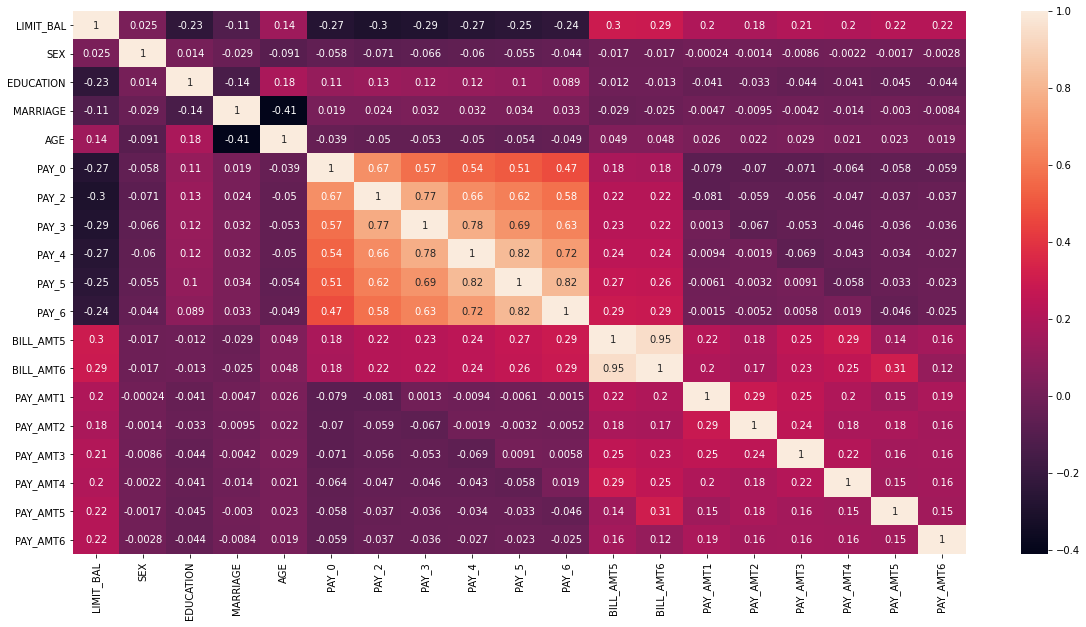

In [ ]:
#Correlation matrix

corrmat=data_new.corr()
# Plot correlation matrix
fig, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, annot=True)

**From the above confusion matrix we see that a customer who does PAY_4 is likely to make PAY_5, customer who does PAY_5 is likely to make PAY_6**

In [ ]:
X_lr=data_new.drop('PAY_4', axis=1) #Dropping PAY_4
y_lr=data_new['PAY_4'].values
X_lr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_5,PAY_6,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-1.530046,-1.486041,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.234917,1.992316,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.234917,0.253137,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.234917,0.253137,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.234917,0.253137,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [ ]:
X_lr=data_new.drop('PAY_5', axis=1) #Dropping PAY_5
y_lr=data_new['PAY_5'].values
X_lr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.486041,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,1.992316,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.253137,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.253137,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.253137,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [ ]:
X_lr=data_new.drop('PAY_6', axis=1) #Dropping PAY_6
y_lr=data_new['PAY_6'].values
X_lr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [ ]:
# train cv test split
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.20, stratify=y_lr)
#X_train_df, X_cv, y_train_df, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)    

In [ ]:
print("Number of train data points",X_train_lr.shape[0]) #Training dataset
print("Number of test data points",X_test_lr.shape[0]) #Test dataset

Number of train data points 24000
Number of test data points 6000


In [ ]:

from sklearn.linear_model import LogisticRegression
#creating an instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)
# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=15,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# getting feature importance 
importance=logistic_regression.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: -0.00001
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00004
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00001
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00004
Feature: 18, Score: -0.00003
Feature: 19, Score: -0.00001
Feature: 20, Score: -0.00001
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00000


In [ ]:
# Weight vectors tell us which about features are important in Logistic Regression
print(logistic_regression.coef_)
print(logistic_regression.intercept_)

[[-5.28685372e-06 -2.19837989e-06 -2.65251511e-06 -2.38835445e-06
  -3.85749990e-05  2.90552960e-06  2.26826947e-06  1.96775716e-06
   1.84775339e-06  1.73296773e-06  1.63261564e-06 -1.10396577e-05
   6.73860774e-06  2.83069091e-06 -6.99174157e-07  3.80029871e-06
   2.54648071e-06 -4.20422006e-05 -2.93937879e-05 -9.00677525e-06
  -1.22529478e-05 -4.74723801e-06 -2.79013997e-06]]
[-1.27136583e-06]


Weight vectors tell us about feature importance. Here as we have 24 classes(categories) so for each feature it will have some weight which will contribute for a given class prediction.

In [ ]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PREDICTION,pay,default,Total
TRUE,,,
pay,4672,1,4673
default,1327,0,1327
Total,5999,1,6000


In [ ]:
100*metrics  #To get the accuracy of Logistic Regression.

,NULL,LogisticReg,ClassTree,DecisionTree,RFC
accuracy,77.0667,77.8667,79.000000,78.216667,81.333333
precision,NaN,0,53.522608,51.048218,63.529412
recall,NaN,0,38.357197,36.699322,36.623964


**We see that the accuracy for Logistic Regression is 77.06%**

### **Questions:**

**1: Is the relationship significant ?**

Yes, because the independent variables are used to predict the dependent variables.When the significance level is 0.05, it indicates a 5% risk of concluding that an association exists when there is no actual association. If the p-value is less than or equal to the significance level, you can conclude that there is a statistically significant association between the response variable and the term. 


**2: Is there any multicollinearity in the model?**

Yes, multicollinearity exists between the features. 
Multicolinearity in Logistic Regression is identified by correlation matrix, tolerance and VIF values and confirmed by condition index and variance proportions. Hence we have used VIF(Variable Inflation factors) on our model to remove whatever correlated features exist and get all non collinear features to build the model.


**3: In the multivariate models are predictor variables independent of all the other predictor variables**

Yes, since we have used VIF(Variable Inflation factors), we were successfully able to remove the features which were dependent on other features.


**4: Are any model assumptions violated?**

The model performed as expected, that is it was able to classify the data into 
multiclasses, so no model assumptions were violated.


**5: In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

PAY_4,PAY_5 and PAY_6 are most important predictor variables in prediction of target.


**6: Does the model makes sense?**

Logistic Regression is a good fit for large datasets, my dataset has 30,000
records. My dataset was affected by multicollinearity and I had to remove the collinearity between some of my features. After that I was able to achieve an accuracy of 77.06%.



**7:Does regularization help?**

Regularization does not improve the performance on the dataset used by the algorithm but it can improve the performance  on new, unseen data. It is used to avoid the overfitting problem. We apply regularization to the cost function so that the value of the parameters are updated.

Logistic Regression is useful to get rid of the overfitting issue with the data but the equation (C=1/lambda) tells us that C determines the strength, lambda is 0 when C is high. This means that loss term in logistic regression is overfitting. Lambda is high when C is low, this results in underfitiing. It also creates sparsity. If we give more weight to the regularization term then it could minimize W-squared (W^2) term and the features could be 0. 


**8: Which independent variables are significant?**

Weight vectors are the ones that can tell us what independent variables are significant. model.coef[0] is a property of Logistic Regression that tells us which features are worth.


**9:Which hyperparameters are important?**

In Logistic regression C is very important and a function called as 'randomSearchCV' is used to calcualte it. As to why C is important I have described it in the question above.

## **Decision Trees**

In [ ]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4242,431,4673
default,830,497,1327
Total,5072,928,6000


In [ ]:
metrics*100  #To see the accuracy of Decision Tree

,NULL,LogisticReg,ClassTree,DecisionTree,RFC
accuracy,77.0667,77.8667,78.983333,78.216667,81.333333
precision,NaN,0,53.556034,51.048218,63.529412
recall,NaN,0,37.452901,36.699322,36.623964


### **We see that the accuracy of the Decision Tree is 78.21%**

In [ ]:

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtml=DecisionTreeClassifier()
dtml.fit(X_train,y_train)

# getting feature importance 
importance=dtml.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 0.05974
Feature: 1, Score: 0.01205
Feature: 2, Score: 0.01868
Feature: 3, Score: 0.01400
Feature: 4, Score: 0.07805
Feature: 5, Score: 0.16034
Feature: 6, Score: 0.03703
Feature: 7, Score: 0.01187
Feature: 8, Score: 0.00738
Feature: 9, Score: 0.01058
Feature: 10, Score: 0.00976
Feature: 11, Score: 0.06517
Feature: 12, Score: 0.05059
Feature: 13, Score: 0.03849
Feature: 14, Score: 0.04541
Feature: 15, Score: 0.04448
Feature: 16, Score: 0.04687
Feature: 17, Score: 0.04663
Feature: 18, Score: 0.04805
Feature: 19, Score: 0.05662
Feature: 20, Score: 0.04379
Feature: 21, Score: 0.04282
Feature: 22, Score: 0.05160


**Decision Tree has an inbuilt property called as feature_importances_ which gives feature importance for each feature.**


**Working:** The impurity-based feature importance.

The higher the impurity, the feature is even more important.
The importance of a feature is computed as the (normalized) total reduction of the entropy or Gini impurity(criterion) brought by that feature.That is known as
Gini importance.

**Questions:**

**1: Is the relationship significant ?**

Yes, because decision trees tell us which features to choose and what conditions to use for splitting, along with knowing when to stop growing the tree. As the tree grows, we need to trim it down.

**2: Is there any multicollinearity in the model?**

No, decision tree does not have multicollinearity because everytime the tree decides to split it will select one of the perfect features.

**3: In the multivariate models are predictor variables independent of all the other predictor variables?**

Predictor variables are outcome variables based on the value of two or more independant variables. In decision tree, the predictor variables are based on other the outcome of other variables. Decision tree works for categorical and continuous dependent variables.

**4: Are any model assumptions violated?**

As decision tree has no probabilistic model and only has binary split, we do not need to make any model assumptions.

**5: In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

LIMIT_BAL (FEATURE 0) AND PAY_BAL (FEATURE 5) are most important predictor variables in prediction of target.

**6: Does the model makes sense?**

Yes, the model makes sense as
we make the best possible choice every single time and 
Use of probabilities enables the “risk” of the options to be addressed. The accuracy achieved using decision tree was 78.21%

**7:Does regularization help?**

Regularization is applied to a cost function that is used to update the values of parameters. Since we are not trying to predict the correct value for the feature in Decision trees then we don't prevent overfitting by changing the value of the feature.

**8: Which independent variables are significant?**

Feature importancein decision tree is calculated as the decrease in node impurity weighted by the probability of reaching that node.The higher the value the more important the feature.

**9:Which hyperparameters are important?**

In decision tree we use a feature called as max_features which gives us all the parameters to consider when we are finding the best split. If not stated,the model considers all of the features.

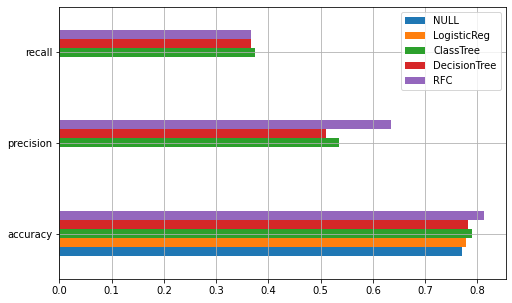

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

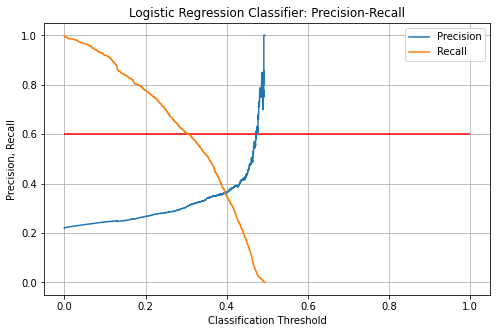

In [ ]:
#Confusion matrix for Modified Logistic Regression 

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

### **Results and Conclusion**

In [ ]:
df.rename(columns={'PAY_1':'PAY_STATUS_1_MONTH_BEFORE',   #Feature Importance
                   'PAY_2':'PAY_STATUS_2_MONTH_BEFORE',
                   'PAY_3':'PAY_STATUS_3_MONTH_BEFORE',
                   'PAY_4':'PAY_STATUS_4_MONTH_BEFORE',
                   'PAY_5':'PAY_STATUS_5_MONTH_BEFORE',
                   'PAY_6':'PAY_STATUS_6_MONTH_BEFORE',
                   'BILL_AMT1': 'BILL_AMT_1_MONTH_BEFORE',
                   'BILL_AMT2': 'BILL_AMT_2_MONTH_BEFORE',
                   'BILL_AMT3': 'BILL_AMT_3_MONTH_BEFORE',
                   'BILL_AMT4': 'BILL_AMT_4_MONTH_BEFORE',
                   'BILL_AMT5': 'BILL_AMT_5_MONTH_BEFORE',
                   'BILL_AMT6': 'BILL_AMT_6_MONTH_BEFORE',
                   'PAY_AMT1': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT2': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT3': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT4': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT5': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT6': 'PAY_AMT_6_MONTH_BEFORE',
                  },inplace=True)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_STATUS_2_MONTH_BEFORE', 'PAY_STATUS_3_MONTH_BEFORE',
       'PAY_STATUS_4_MONTH_BEFORE', 'PAY_STATUS_5_MONTH_BEFORE',
       'PAY_STATUS_6_MONTH_BEFORE', 'BILL_AMT_5_MONTH_BEFORE',
       'BILL_AMT_6_MONTH_BEFORE', 'PAY_AMT_6_MONTH_BEFORE',
       'PAY_AMT_6_MONTH_BEFORE', 'PAY_AMT_6_MONTH_BEFORE',
       'PAY_AMT_6_MONTH_BEFORE', 'PAY_AMT_6_MONTH_BEFORE',
       'PAY_AMT_6_MONTH_BEFORE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


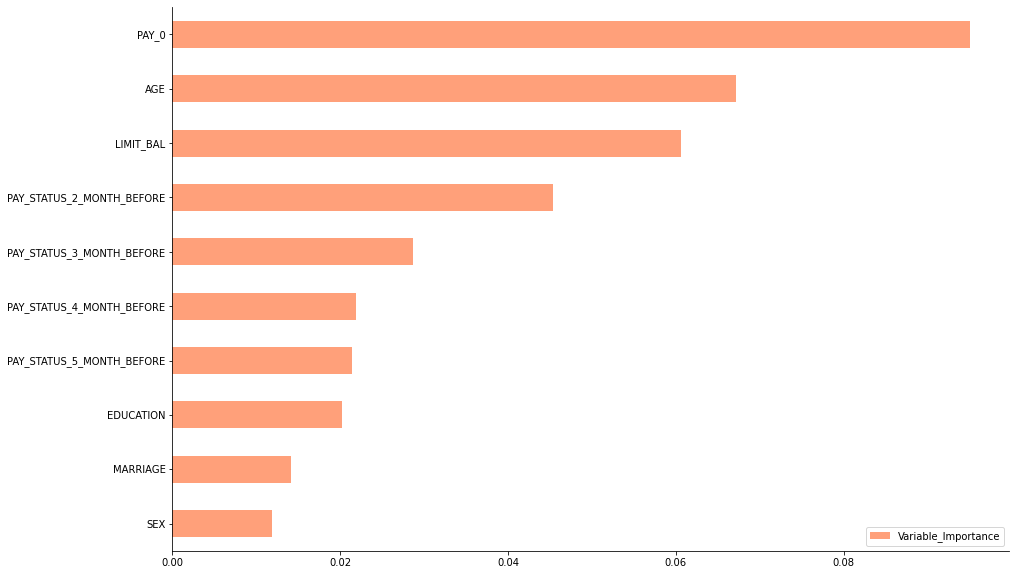

In [ ]:
#Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]


# Split using train-test-split just because I want to get the columns to use for later
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Initializing the scaler  (Just scale every single time lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors on the train/val dataset
X = std.transform(X.values) 

## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X_train, y_train) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_[:10],
                                   index = X_train_val.columns[:10],  # use X_train_val just for getting the name of the columns back
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)
# Set seaborn contexts 
feature_importance.plot.barh(figsize=(15,10),color='lightsalmon')
sns.despine()

plt.savefig('feature_importance.png', transparent = True)

### **RandomForestClassifier gave us the highest accuracy to predict, which was 81.33%. Followed by Decision Tree, which was 78.21% and last by LogisticRegression which was 77.86%. The top features were PAY_0, AGE and LIMIT_BAL**

## **Citations and References**: <br>
<br>


1.   © Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.  
2.   © Illustration: Lazaro Gamio/Axios
3. https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values
4.  https://machinelearningmastery.com/calculate-feature-importance-with-python/
5. https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa
6. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
7. https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
8.  https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
9. https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
10. https://machinelearningmastery.com/calculate-feature-importance-with-python/
11. https://towardsdatascience.com/all-the-annoying-assumptions-31b55df246c3






**MIT License**

**Copyright (c) [2020] [Priyanka Bandekar]**

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.